# 빅데이터 분석 (5주차) 10월7일
> 알렉스넷(잡담), 로지스틱 회귀분석 

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- Categories: [Alexnet, logistic regression]

만화화, 흥미롭다. https://brunch.co.kr/@hvnpoet/109

`-` Alexnet알렉스넷

- 힌튼 교수님 주요 인물
 - 딥러닝 문제 해결방법 제시했는데 아무도 몰라주는데 공모전을 나가게 됨
 - 이제껏 오류율이 28%, 26% 이랬음
 - 교수님 제자인 알렉스가 GPU 사용 제안, CPU는 학습 속도가 너무 느리기 때문.
 - 하지만 overfitting 문제 발생, 다른 제자가 dropout 제안
 - GPU 써도 학습 속도가 느리네?
 - 벤지오연구실의 ReLU 함수를 써보자고 알렉스가 제안
 - 2012년 우승해서 알렉스넷 제안, 오류율은 무려 16%!!

### Logistic regression 

In [28]:
import torch 
import matplotlib.pyplot as plt

### Example 

`-` 현실에서  $x$가 커질수록 (혹은 작아질수록) 성공확률이 증가하는 경우가 많음

`-` 현실의 모형은 아래와 같이 설계할 수 있음 <--- 외우세요!!!

- $y_i \sim Ber(\pi_i),\quad $ where $\pi_i = \frac{\exp(w_0+w_1x_i)}{1+\exp(w_0+w_1x_i)}$

- $\hat{y}_i= \frac{\exp(\hat{w}_0+\hat{w}_1x_i)}{1+\exp(\hat{w}_0+\hat{w}_1x_i)}=\frac{1}{1+\exp(-\hat{w}_0-\hat{w}_1x_i)}$ 
    - 여기서 $\hat{y}$는 $\hat{\pi_i}$


- $loss= - \sum_{i=1}^{n} \big(y_i\log(\hat{y}_i)+(1-y_i)\log(1-\hat{y}_i)\big)$ <--- 외우세요!!{수업 여쭤볼까}

`-` 예제시작 

In [33]:
X=torch.linspace(-1,1,2000).reshape(2000,1)
w0= - 1 
w1= 5 
u = w0+X*w1 # 이건 대각선이 나옴
v = torch.exp(u)/(1+torch.exp(u)) # v=πi
y = torch.bernoulli(v) 

In [37]:
u,v,y

(tensor([[-6.0000],
         [-5.9950],
         [-5.9900],
         ...,
         [ 3.9900],
         [ 3.9950],
         [ 4.0000]]),
 tensor([[0.0025],
         [0.0025],
         [0.0025],
         ...,
         [0.9818],
         [0.9819],
         [0.9820]]),
 tensor([[0.],
         [0.],
         [0.],
         ...,
         [1.],
         [1.],
         [1.]]))

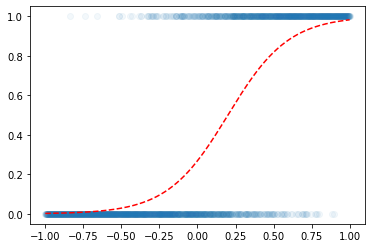

In [35]:
plt.scatter(X,y,alpha=0.05)
plt.plot(X,v,'--r')

`-` 다이어그램으로 표현하면 

In [38]:
import graphviz

In [39]:
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"' + s + '; }')

ref: http://taewan.kim/post/sigmoid_diff/
유명한 활성화 함수

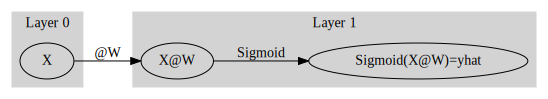

In [40]:
#collapse
gv('''
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "X" 
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "X" -> "X@W"[label="@W"]
    "X@W" -> "Sigmoid(X@W)=yhat"[label="Sigmoid"]
    label = "Layer 1"
}
''')

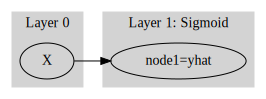

In [41]:
#collapse
gv('''
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    X
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    X -> "node1=yhat"
    label = "Layer 1: Sigmoid"
}
''')

`-` 아키텍처, 손실함수, 옵티마이저 

$$Sigmoid(x)=\sigma(x)=\frac{1}{1+exp(-x)}$$

In [56]:
#torch.manual_seed(202150754) 
l1=torch.nn.Linear(in_features=1,out_features=1,bias=True) 
a1=torch.nn.Sigmoid() 
net=torch.nn.Sequential(l1,a1) 
#loss = torch.mean((y-yhat)**2) <--- 이러면 안됩니다!!!
optimizer=torch.optim.SGD(net.parameters(),lr=0.05) 

In [57]:
net

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Sigmoid()
)

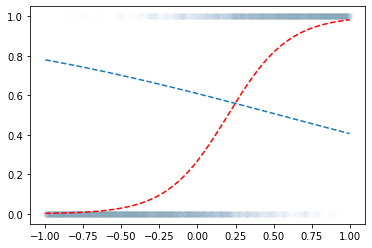

In [58]:
plt.scatter(X,y,alpha=0.01) 
plt.plot(X,net(X).data,'--') 
plt.plot(X,v,'--r') # 파란 선을 빨간 선과 일치 시키는 과정 필요

`-` step1~4 

In [59]:
for epoc in range(10000): 
    ## 1 
    yhat=net(X) 
    ## 2 
    loss=-torch.mean(y*torch.log(yhat) + (1-y)*torch.log(1-yhat)) 
    ## 3 
    loss.backward() 
    ## 4 
    optimizer.step() 
    net.zero_grad() 

In [60]:
list(net.parameters())

[Parameter containing:
 tensor([[4.9150]], requires_grad=True),
 Parameter containing:
 tensor([-0.8898], requires_grad=True)]

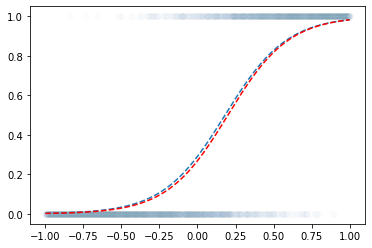

In [61]:
plt.scatter(X,y,alpha=0.01) 
plt.plot(X,net(X).data,'--') 
plt.plot(X,v,'--r')

### 숙제 

loss를 mse로 바꿔서 돌려볼것 

In [62]:
#torch.manual_seed(202150754) 
#l1=torch.nn.Linear(in_features=1,out_features=1,bias=True) 
#a1=torch.nn.Sigmoid() 
#net=torch.nn.Sequential(l1,a1) 
#optimizer=torch.optim.SGD(net.parameters(),lr=0.05) 
loss_fn=torch.nn.MSELoss()

In [63]:
for epoc in range(10000): 
    ## 1 
    yhat=net(X) 
    ## 2 
#####    loss=-torch.mean(y*torch.log(yhat) + (1-y)*torch.log(1-yhat)) <-- 여기만수정해서!!
    loss=loss_fn(y,yhat)
    ## 3 
    loss.backward() 
    ## 4 
    optimizer.step() 
    net.zero_grad() 

In [64]:
list(net.parameters())

[Parameter containing:
 tensor([[4.8740]], requires_grad=True),
 Parameter containing:
 tensor([-0.8902], requires_grad=True)]

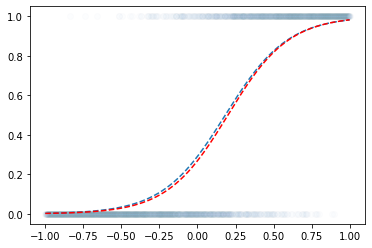

In [65]:
plt.scatter(X,y,alpha=0.01) 
plt.plot(X,net(X).data,'--') 
plt.plot(X,v,'--r')

In [68]:
?torch.nn.MSELoss

Init signature: torch.nn.MSELoss(size_average=None, reduce=None, reduction: str = 'mean') -> None
Docstring:     
Creates a criterion that measures the mean squared error (squared L2 norm) between
each element in the input :math:`x` and target :math:`y`.

The unreduced (i.e. with :attr:`reduction` set to ``'none'``) loss can be described as:

.. math::
    \ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad
    l_n = \left( x_n - y_n \right)^2,

where :math:`N` is the batch size. If :attr:`reduction` is not ``'none'``
(default ``'mean'``), then:

.. math::
    \ell(x, y) =
    \begin{cases}
        \operatorname{mean}(L), &  \text{if reduction} = \text{`mean';}\\
        \operatorname{sum}(L),  &  \text{if reduction} = \text{`sum'.}
    \end{cases}

:math:`x` and :math:`y` are tensors of arbitrary shapes with a total
of :math:`n` elements each.

The mean operation still operates over all the elements, and divides by :math:`n`.

The division by :math:`n` can be avoided if one sets ``reductio